# What does it take to become a legend in Tennis
By Kristian, Pavan and Boris <br>
<i>Department of Data Science and Knowledge Engineering, Maastricht University<i>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

sns.set_theme(style="darkgrid")

pd.options.mode.chained_assignment = None  # default='warn'

## Import the data 
Already filtered keeping seasons 2019 to 2021

In [3]:
df_2019 = pd.read_csv("data/atp_matches_2019.csv")
df_2020 = pd.read_csv("data/atp_matches_2020.csv")
df_2021 = pd.read_csv("data/atp_matches_2021.csv")

seasons = [df_2019, df_2020, df_2021]
df_full = pd.concat(seasons)

# check whether we have same number of columns
# assert len(df_2019.columns) == len(df_full.columns)

df_full.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,c
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,...,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,NaN
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,...,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,NaN
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,...,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,NaN
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,...,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,NaN
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,...,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,NaN


## Does height provide an advantage during service?

In [ ]:
df_serv = df_full.dropna(subset=['winner_ht','loser_ht', 'w_ace', 'w_svpt',
                                 'l_ace', 'l_svpt'])
print('before removing na:', len(df_full), 'after:', len(df_serv))
df_serv['w_ace_ratio'] = df_serv['w_ace'] / df_serv['w_svpt']
df_serv['l_ace_ratio'] = df_serv['l_ace'] / df_serv['l_svpt']

before removing na: 6985 after: 5381


<Figure size 864x648 with 0 Axes>

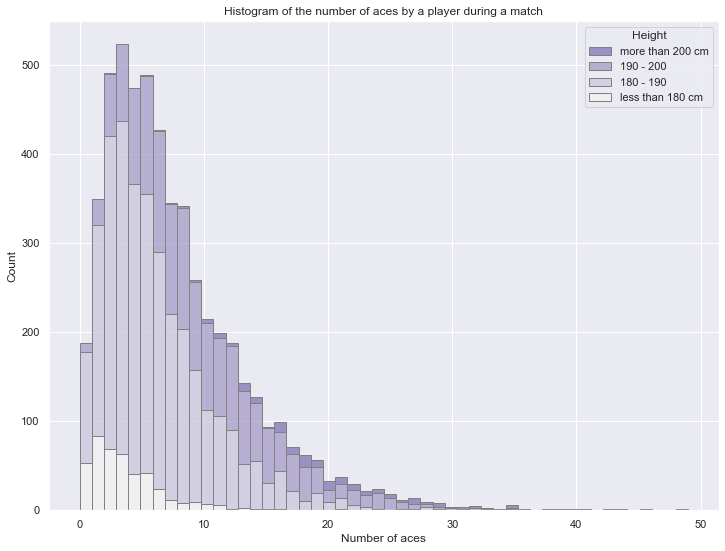

<Figure size 864x648 with 0 Axes>

In [ ]:
df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

df_serv.loc[df_serv['winner_ht'] >= 200, 'Height'] = 'more than 200 cm'
df_serv.loc[df_serv['winner_ht'] < 200, 'Height'] = '190 - 200'
df_serv.loc[df_serv['winner_ht'] < 190, 'Height'] = '180 - 190'
df_serv.loc[df_serv['winner_ht'] < 180, 'Height'] = 'less than 180 cm'

hue_order = ['more than 200 cm', '190 - 200', '180 - 190', 'less than 180 cm']

plot = sns.histplot(df_serv, x="w_ace", hue="Height",multiple="stack",
                    palette="light:m_r", hue_order=hue_order, edgecolor=".5",
                    bins = 50)

plot.set_xlabel('Number of aces')
plot.set_title('Histogram of the number of aces by a player during a match')
plt.figure()

<Figure size 864x648 with 0 Axes>

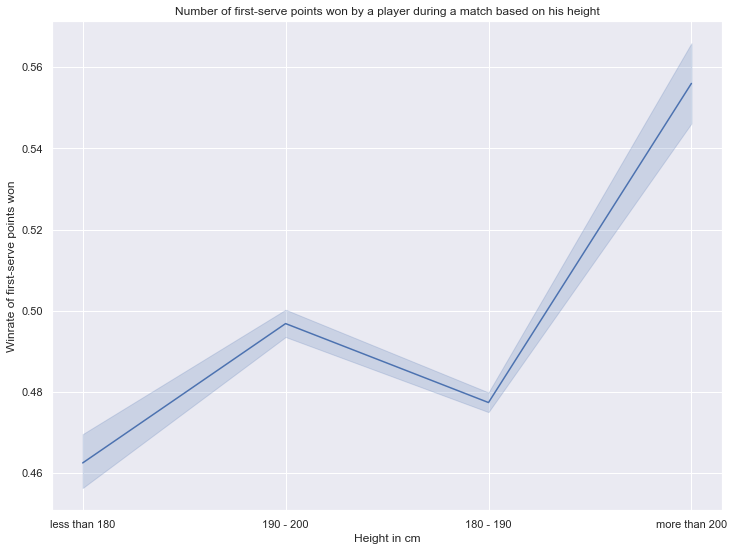

<Figure size 864x648 with 0 Axes>

In [ ]:
df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

df_serv.loc[df_serv['winner_ht'] >= 200, 'Height'] = 'more than 200'
df_serv.loc[df_serv['winner_ht'] < 200, 'Height'] = '190 - 200'
df_serv.loc[df_serv['winner_ht'] < 190, 'Height'] = '180 - 190'
df_serv.loc[df_serv['winner_ht'] < 180, 'Height'] = 'less than 180'

df_serv['1st_winrate'] = df_serv['w_1stWon'] / df_serv['w_svpt']

plot = sns.lineplot(x="Height", y="1st_winrate", data=df_serv)

plot.set_xlabel('Height in cm')
plot.set_ylabel('Winrate of first-serve points won')
plot.set_title('Number of first-serve points won by a player during a match based on his height')
plt.figure()

<Figure size 864x648 with 0 Axes>

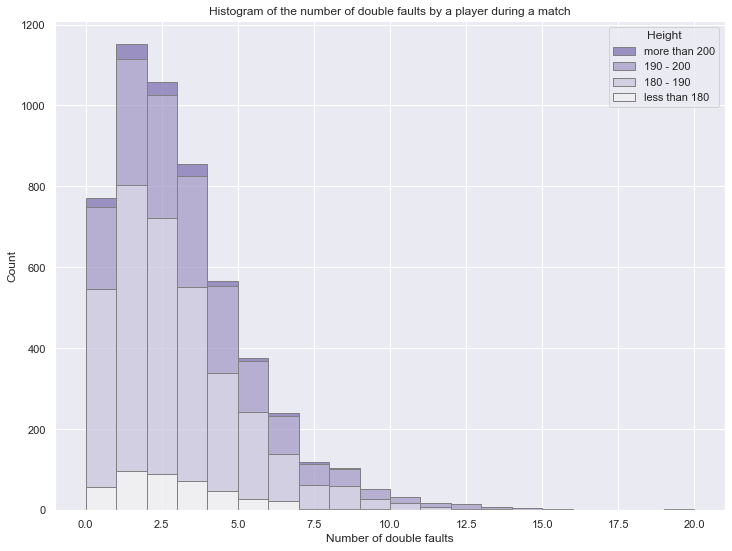

<Figure size 864x648 with 0 Axes>

In [ ]:
df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

df_serv.loc[df_serv['winner_ht'] >= 200, 'Height'] = 'more than 200'
df_serv.loc[df_serv['winner_ht'] < 200, 'Height'] = '190 - 200'
df_serv.loc[df_serv['winner_ht'] < 190, 'Height'] = '180 - 190'
df_serv.loc[df_serv['winner_ht'] < 180, 'Height'] = 'less than 180'

hue_order = ['more than 200', '190 - 200', '180 - 190', 'less than 180']

plot = sns.histplot(df_serv, x="w_df", hue="Height",multiple="stack",
                    palette="light:m_r", hue_order=hue_order, edgecolor=".5",
                    bins = 20)

plot.set_xlabel('Number of double faults')
plot.set_title('Histogram of the number of double faults by a player during a match')
plt.figure()

<Figure size 864x648 with 0 Axes>

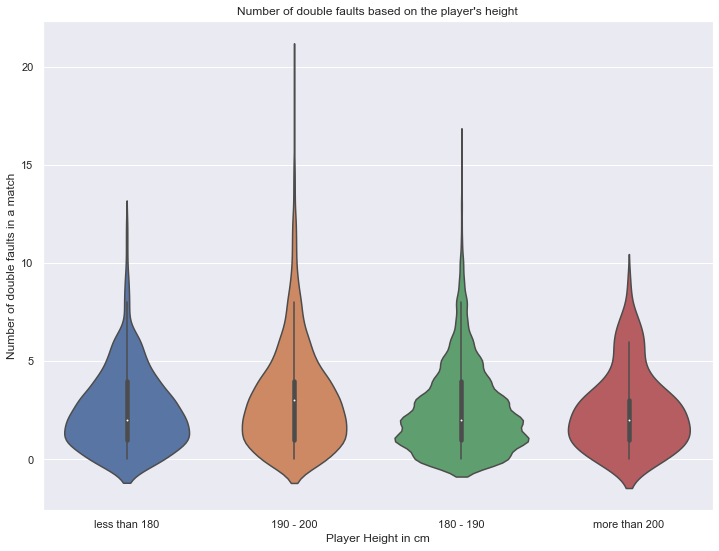

<Figure size 864x648 with 0 Axes>

In [ ]:
df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

plot = sns.violinplot(x="Height", y="w_df",#  hue='tourney_level',
             data=df_serv)

plot.set_xlabel('Player Height in cm')
plot.set_ylabel('Number of double faults in a match')
plot.set_title('Number of double faults based on the player\'s height')
plt.figure()

<Figure size 864x648 with 0 Axes>

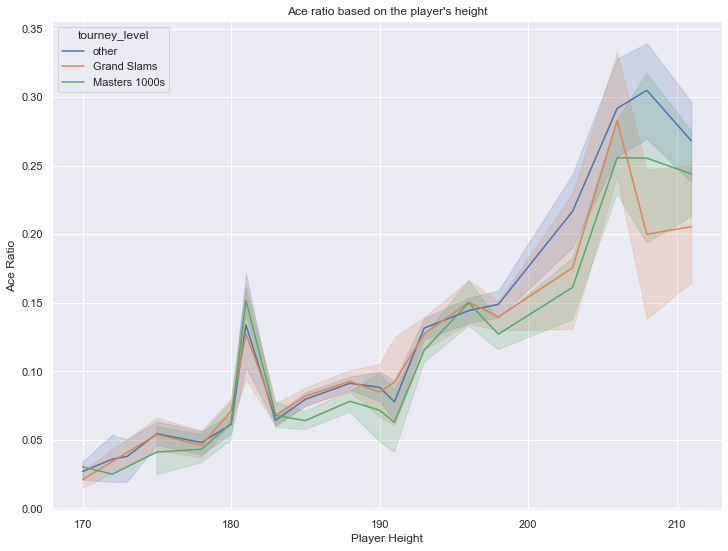

<Figure size 864x648 with 0 Axes>

In [ ]:
df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

plot = sns.lineplot(x="winner_ht", y="w_ace_ratio", hue='tourney_level',
             data=df_serv)

plot.set_xlabel('Player Height')
plot.set_ylabel('Ace Ratio')
plot.set_title('Ace ratio based on the player\'s height')
plt.figure()

In [ ]:
print('Correlation between the winner ace ratio and winner height is of:',
      df_serv.corr()['w_ace_ratio']['winner_ht'])
print('Correlation between the winner double faults and winner height is of:',
      df_serv.corr()['w_df']['winner_ht'])
print('Correlation between the winner first point winrate and winner height is of:',
      df_serv.corr()['1st_winrate']['winner_ht'])

Correlation between the winner ace ratio and winner height is of: 0.5287188755472769
Correlation between the winner double faults and winner height is of: 0.09891052293492311
Correlation between the winner first point winrate and winner height is of: 0.22797781645665433


In [ ]:
print('winrate for players taller than 200cm:',
      len(df_serv[df_serv['winner_ht'] >= 200]) /
      (len(df_serv[df_serv['winner_ht'] >= 200]) +
       len(df_serv[df_serv['loser_ht'] >= 200])))
print('winrate for players with height between 190-200cm:',
      len(df_serv[(df_serv['winner_ht'] >= 190) & (df_serv['winner_ht'] < 200)]) /
      (len(df_serv[(df_serv['winner_ht'] >= 190) & (df_serv['winner_ht'] < 200)]) +
       len(df_serv[(df_serv['loser_ht'] >= 190) & (df_serv['loser_ht'] < 200)])))
print('winrate for players with height between 180-190cm:',
      len(df_serv[(df_serv['winner_ht'] >= 180) & (df_serv['winner_ht'] < 190)]) /
      (len(df_serv[(df_serv['winner_ht'] >= 180) & (df_serv['winner_ht'] < 190)]) +
       len(df_serv[(df_serv['loser_ht'] >= 180) & (df_serv['loser_ht'] < 190)])))
print('winrate for players with height between 170-180cm:',
      len(df_serv[(df_serv['winner_ht'] >= 170) & (df_serv['winner_ht'] < 180)]) /
      (len(df_serv[(df_serv['winner_ht'] >= 170) & (df_serv['winner_ht'] < 180)]) +
        len(df_serv[(df_serv['loser_ht'] >= 170) & (df_serv['loser_ht'] < 180)])))

winrate for players taller than 200cm: 0.5371024734982333
winrate for players with height between 190-200cm: 0.5285313376987839
winrate for players with height between 180-190cm: 0.488525620873939
winrate for players with height between 170-180cm: 0.46813186813186813
